In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Dates,DayOfWeek,PdDistrict,avg_temp,precipitation,wind_speed,visibility,NFL_Output,NFL_Home,NFL_Game_Day
0,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
1,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
2,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
3,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
4,2015-05-13,Wednesday,PARK,15,0.0,19.0,40.0,No Game,3,0


In [4]:
data.tail()

,Dates,DayOfWeek,PdDistrict,avg_temp,precipitation,wind_speed,visibility,NFL_Output,NFL_Home,NFL_Game_Day
878044,2003-01-06,Monday,TARAVAL,14,0.0,13.0,16.0,No Game,3,0
878045,2003-01-06,Monday,INGLESIDE,14,0.0,13.0,16.0,No Game,3,0
878046,2003-01-06,Monday,SOUTHERN,14,0.0,13.0,16.0,No Game,3,0
878047,2003-01-06,Monday,SOUTHERN,14,0.0,13.0,16.0,No Game,3,0
878048,2003-01-06,Monday,BAYVIEW,14,0.0,13.0,16.0,No Game,3,0


In [5]:
#data = data.set_index('Dates')


In [6]:
data['Dates'] = pd.to_datetime(data['Dates'])

In [7]:
data.head()

,Dates,DayOfWeek,PdDistrict,avg_temp,precipitation,wind_speed,visibility,NFL_Output,NFL_Home,NFL_Game_Day
0,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
1,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
2,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
3,2015-05-13,Wednesday,NORTHERN,15,0.0,19.0,40.0,No Game,3,0
4,2015-05-13,Wednesday,PARK,15,0.0,19.0,40.0,No Game,3,0


In [8]:
data = data.set_index('Dates')

In [9]:
#Aquí realizamos el conteo, nos quedamos con el año 2014 es el que mas datos tiene
#2015 tiene menos datos
crimenes_diarios = data[data.index.year == 2014].resample("D").agg({"PdDistrict":"count"}).dropna()

In [10]:
crimenes_diarios.head()

,PdDistrict
Dates,
2014-01-06,393
2014-01-07,376
2014-01-08,430
2014-01-09,392
2014-01-10,465


In [11]:
crimenes_diarios

,PdDistrict
Dates,
2014-01-06,393
2014-01-07,376
2014-01-08,430
2014-01-09,392
2014-01-10,465
...,...
2014-12-24,370
2014-12-25,257
2014-12-26,409


In [12]:
crimenes_diarios.rename(columns={"PdDistrict":"Daily Crimes"}, inplace=True)
crimenes_diarios.head()

,Daily Crimes
Dates,
2014-01-06,393
2014-01-07,376
2014-01-08,430
2014-01-09,392
2014-01-10,465


In [13]:
# Se sustituyeron los ceros por que tendríamos menos informacíon hasta un 40% de datos menos
crimenes_diarios['Daily Crimes'][crimenes_diarios['Daily Crimes'] == 0] = 380


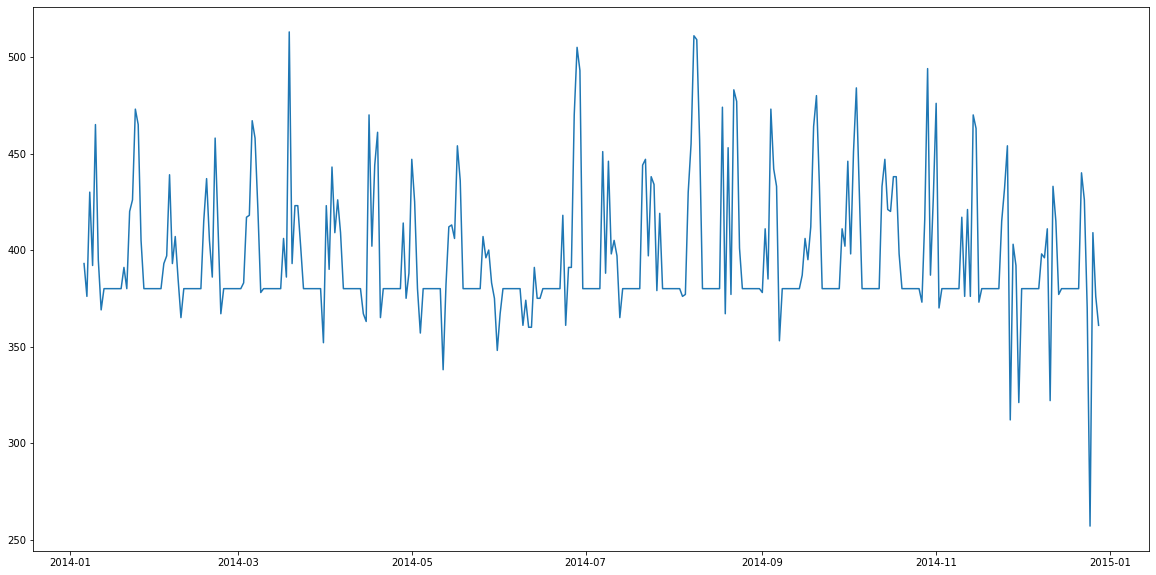

In [14]:
#Graficamos los crimenes díario.
plt.figure(figsize=(20,10))
plt.plot(crimenes_diarios);

In [15]:
#Nos ayuda a descomponer los datos de series temporales en tendencia y estacionalidad
from statsmodels.tsa.seasonal import seasonal_decompose


In [16]:
#Aquí aplicamos nuestra libreria
series = crimenes_diarios
result = seasonal_decompose(series, model='additive')

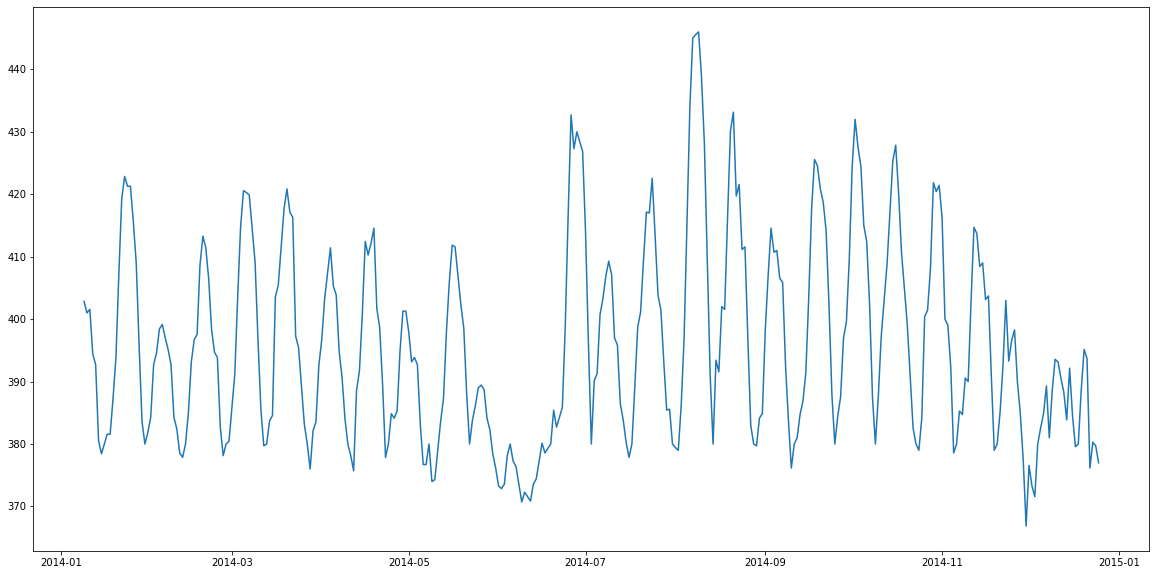

In [17]:
#Gráficamos nuestra tendencía.
#Partiendo de la media general si esta arriba de esta los coeficientes estacionarios serán positivos y por debajo de la media
# Tenemos que serán negativos por lo tanto la tendencía nos muestra estacionalidad
plt.figure(figsize=(20,10))
plt.plot(result.trend);

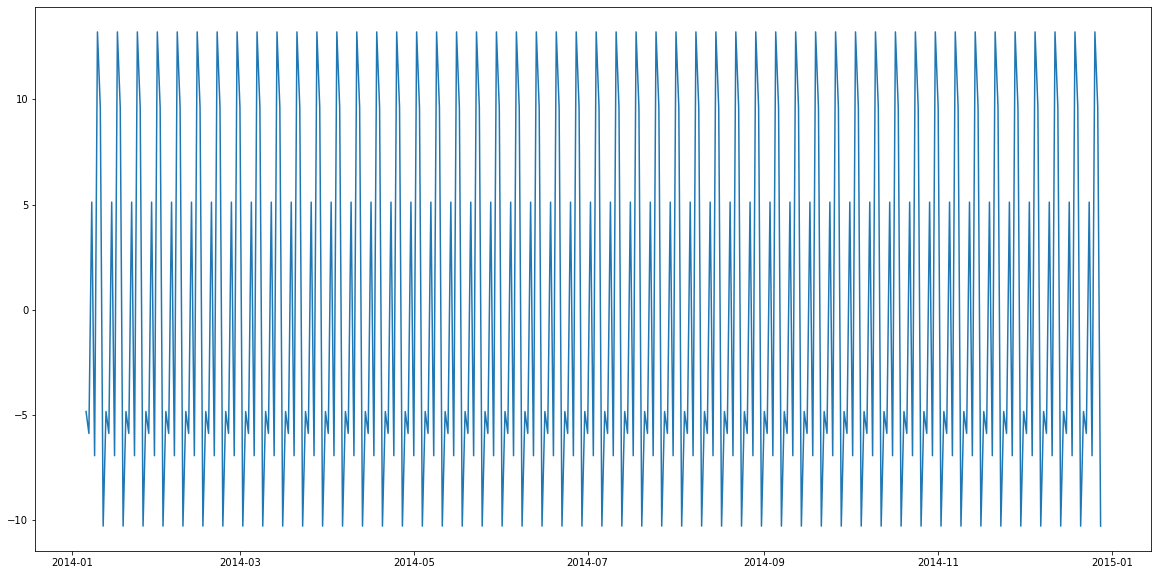

In [18]:
#Componente estacionalidad
#Cambiamos los datos cero por valores promedios ya que con los valores ceros nuestro resultado era bastante 
#Observamos que la frecuencia 
plt.figure(figsize=(20,10))
plt.plot(result.seasonal);

In [19]:
df_t_0  = crimenes_diarios['Daily Crimes']

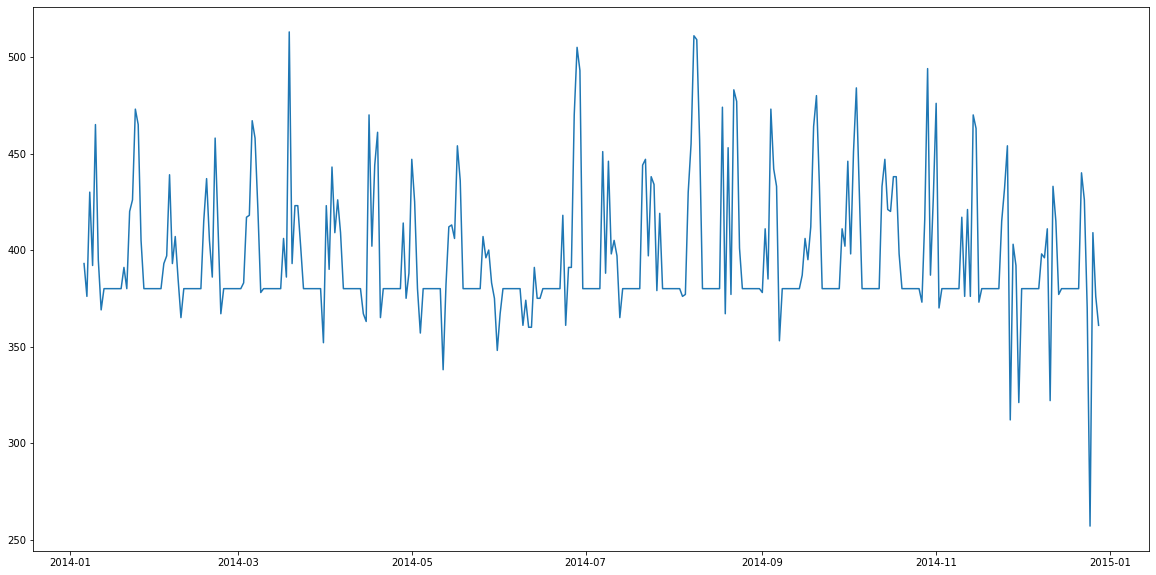

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_t_0);

In [21]:
df_t_1 = df_t_0.shift(1)

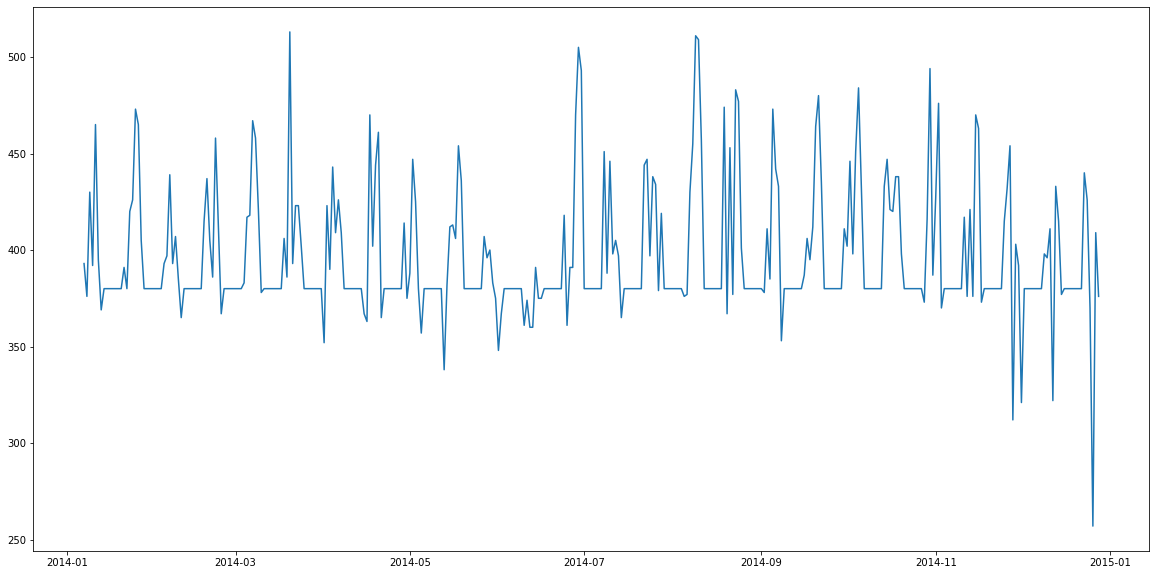

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df_t_1);

In [23]:
df_t_2 = df_t_0.shift(2)

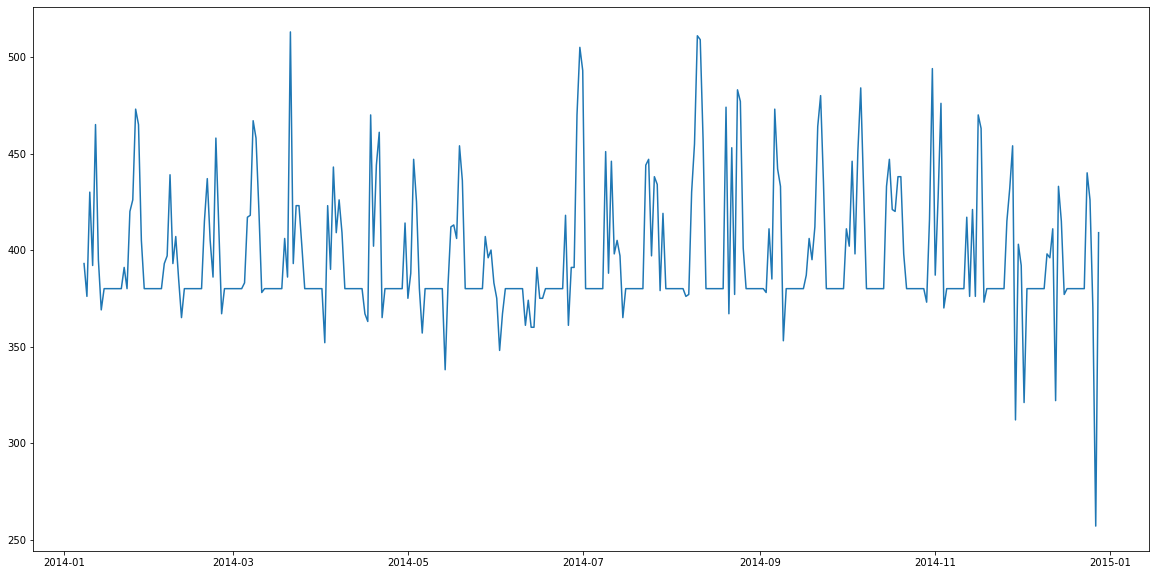

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df_t_2);

In [25]:
df_t_3 = df_t_0.shift(3)

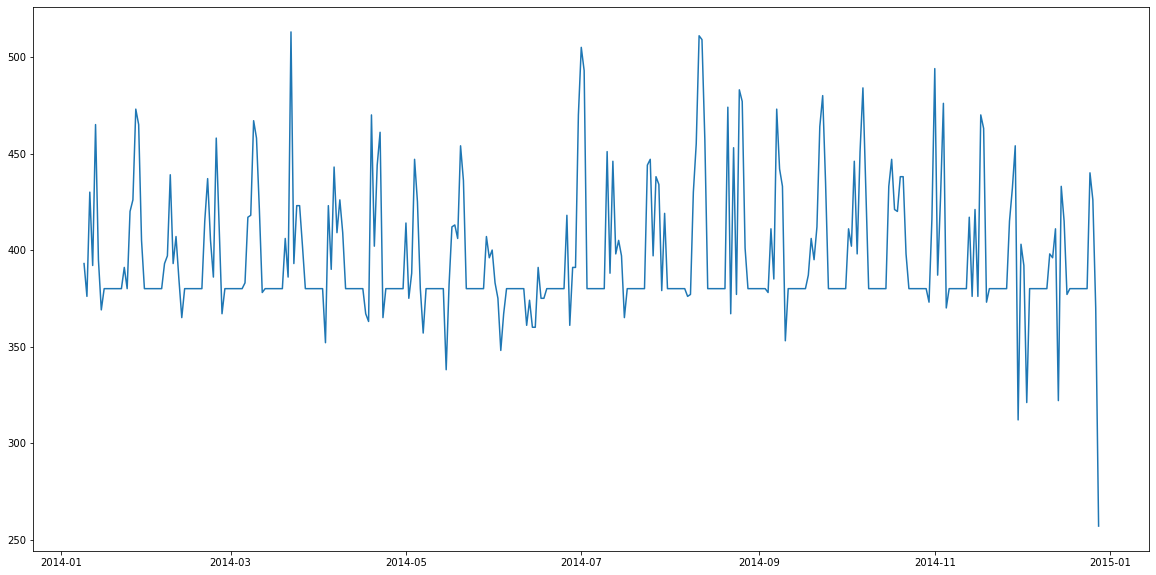

In [26]:
plt.figure(figsize=(20,10))
plt.plot(df_t_3);

In [27]:
df_t_4 = df_t_0.shift(4)

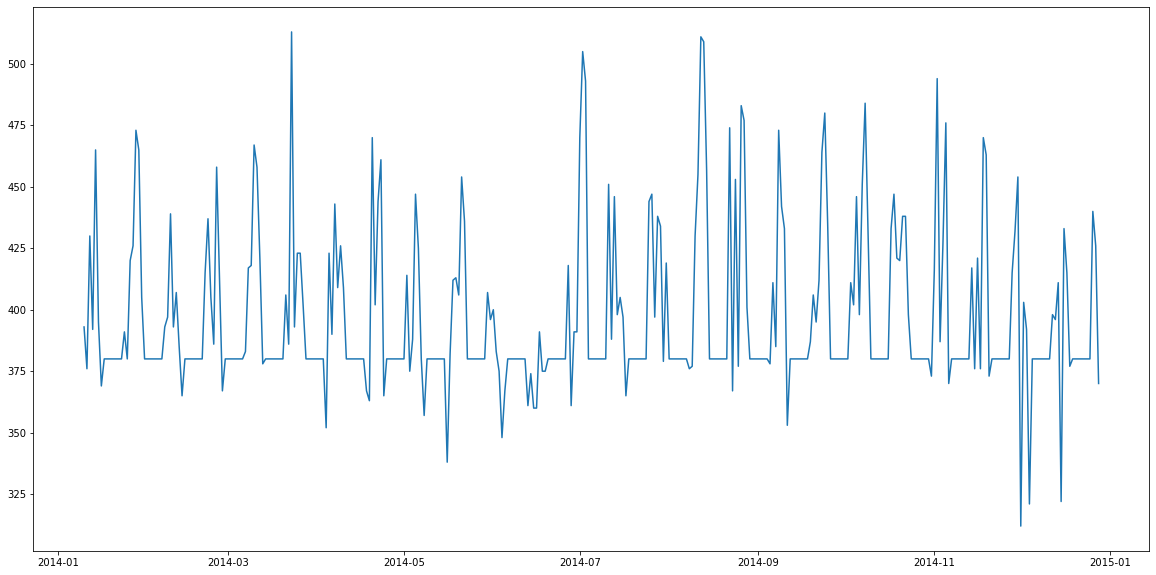

In [28]:
plt.figure(figsize=(20,10))
plt.plot(df_t_4);

In [29]:
df_t_0.corr(df_t_0)

0.9999999999999998

In [30]:
df_t_0.corr(df_t_1)

0.3663704364084303

In [31]:
df_t_0.corr(df_t_2)

0.19798811952687856

In [32]:
df_t_0.corr(df_t_3)

0.043439025937786646

In [33]:
df_t_0.corr(df_t_4)

-0.08740795189404331

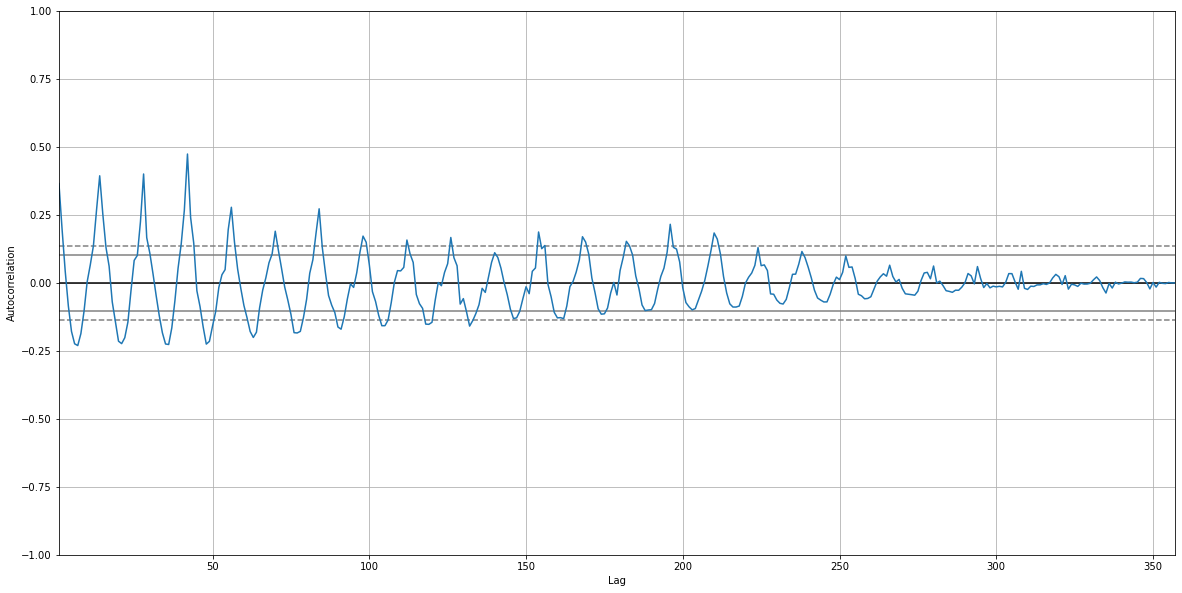

In [34]:
#como va desvaniendo la informacíon respecto al tiempo 
#Lo que nos muestra las autocorrelaciones es la relacion de la serié de tiempo consigomisma con distintos retrasos de tiempo
 plt.figure(figsize=(20,10))

pd.plotting.autocorrelation_plot(df_t_0);

In [35]:
frame = { 'P_crimines': df_t_0, 'lang_1': df_t_1,  'lang_2': df_t_2, 'lang_3': df_t_3, 'lang_4': df_t_4 } 

In [36]:
datospararegre = pd.DataFrame(frame)

In [37]:
datospararegre.head()

,P_crimines,lang_1,lang_2,lang_3,lang_4
Dates,,,,,
2014-01-06,393,NaN,NaN,NaN,NaN
2014-01-07,376,393.0,NaN,NaN,NaN
2014-01-08,430,376.0,393.0,NaN,NaN
2014-01-09,392,430.0,376.0,393.0,NaN
2014-01-10,465,392.0,430.0,376.0,393.0


In [38]:
datospararegre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2014-01-06 to 2014-12-28
Freq: D
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P_crimines  357 non-null    int64  
 1   lang_1      356 non-null    float64
 2   lang_2      355 non-null    float64
 3   lang_3      354 non-null    float64
 4   lang_4      353 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 26.7 KB


In [39]:
datospararegre.corr()

,P_crimines,lang_1,lang_2,lang_3,lang_4
P_crimines,1.000000,0.728095,0.443318,0.139025,-0.126335
lang_1,0.728095,1.000000,0.727647,0.442233,0.138650
lang_2,0.443318,0.727647,1.000000,0.727072,0.442137
lang_3,0.139025,0.442233,0.727072,1.000000,0.727448
lang_4,-0.126335,0.138650,0.442137,0.727448,1.000000


In [40]:
df_con_avg_temp = data[data.index.year == 2014].resample("D").agg({"PdDistrict":"count","avg_temp":"mean"}).dropna()

In [41]:
df_temp = df_con_avg_temp.avg_temp
df_temp.head()

Dates
2014-01-06    11.0
2014-01-07    12.0
2014-01-08    13.0
2014-01-09    13.0
2014-01-10    12.0
Name: avg_temp, dtype: float64

In [42]:
type(df_temp)

pandas.core.series.Series

In [43]:
nuevo = pd.DataFrame(df_temp)


In [44]:
nuevo.head()

,avg_temp
Dates,
2014-01-06,11.0
2014-01-07,12.0
2014-01-08,13.0
2014-01-09,13.0
2014-01-10,12.0


In [45]:
len(nuevo)

182

In [46]:
#frames = [nuevo,datospararegre]
nuevo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2014-01-06 to 2014-12-28
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   avg_temp  182 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [47]:
table_reg = pd.concat([datospararegre,nuevo], axis=1, ignore_index=False)
table_reg.head()

,P_crimines,lang_1,lang_2,lang_3,lang_4,avg_temp
Dates,,,,,,
2014-01-06,393,NaN,NaN,NaN,NaN,11.0
2014-01-07,376,393.0,NaN,NaN,NaN,12.0
2014-01-08,430,376.0,393.0,NaN,NaN,13.0
2014-01-09,392,430.0,376.0,393.0,NaN,13.0
2014-01-10,465,392.0,430.0,376.0,393.0,12.0


In [47]:
table_reg.to_csv('table_reg.csv')